In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators
### C2C Jordan Armstrong
#### Documentation: https://www.comp.nus.edu.sg/~limkw/pubs/Lim_MLE_2017.pdf for the bias of the exponential distirubtion

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


$E(X_i)=\frac{b}{2}$
$$
E(2\bar{X})=2E(\bar{X})=2E(X_i)=2(\frac{b}{2})=b
$$

This means that $2\bar{X}$ is an unbiased estimator of $b$ as $E(2\bar{X})$ hovers around $b$.

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

Analytically,

$$ X_i \text{~} Exp(\lambda)$$

$$ \sum_{i=1}^{n} X_i \text{~} Gamma(N,\lambda)$$

$$
\frac{1}{\sum_{i=1}^{n}X_i} \text{~} InvGamma(N,\lambda)
$$

$$
E(\frac{1}{\sum_{i=1}^{n}X_i})=\frac{\lambda}{N-1} \text{where N >1}
$$

$$
\beta({\hat{\lambda}})=E(\frac{1}{\bar{X}})-\lambda=E(\frac{N}{\sum_{i=1}^{n}X_i})-\lambda=\frac{N\lambda}{N-1}-\lambda=\frac{\lambda}{N-1}
$$

Thus, the bias for $\lambda=5$ and $N=20$ is $\beta=\frac{5}{20-1}=\frac{5}{19}$. The estimate is bias, but the bias decreases as the sample size increases.

Numerically,


In [4]:
parameters=[]

for i in np.arange(10**5):
    lamb=1/np.mean(stats.expon.rvs(scale=1/5, size=20))
    parameters=np.append(parameters, lamb)
    
lamb=np.mean(parameters)
lamb

5.261034312908257

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

Why take the analytical limit, when you can numerically take the limit and make this pretty graph?

$\bar{X}=2X$


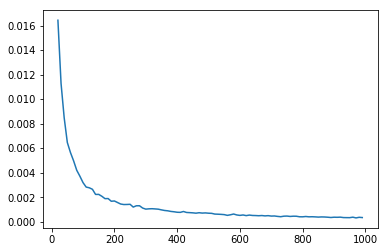

In [12]:
estimates=[]

for i in np.arange(20, 10**3,10):
    xbar=[]
    for j in np.arange(10**3):
        xbar.append(2*np.mean(stats.uniform.rvs(size=i)))
    estimates.append(np.var(xbar))
    
plt.plot(np.arange(20,10**3, 10), estimates)
plt.show()

Since the variance goes to zero, as the sample size goes to infinity, the estimate is consistent. 

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 


Normal distribution: $\bar{X}=X$

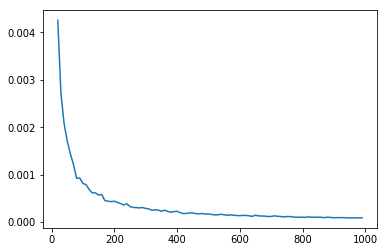

In [13]:
estimates=[]

for i in np.arange(20, 10**3,10):
    xbar=[]
    for j in np.arange(10**3):
        xbar.append(np.mean(stats.uniform.rvs(size=i)))
    estimates.append(np.var(xbar))
    
plt.plot(np.arange(20,10**3, 10), estimates)
plt.show()

Since the variance goes to zero as the sample size goes to zero, the estimate is consistent.

## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

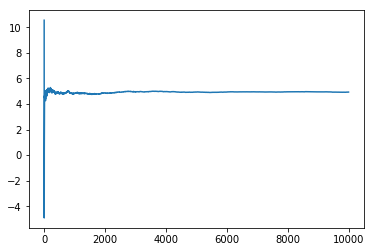

In [6]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()

In [5]:
np.mean(sampmeans)

4.937058468829193

In [7]:
np.std(sampmeans)

0.17343869142752225